#creat folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!unzip /content/drive/MyDrive/cell_images.zip

Archive:  /content/drive/MyDrive/cell_images.zip
replace __MACOSX/._cell_images? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Done with import data, run from here


In [ ]:
from imutils import paths
import random
import shutil
import os

In [ ]:
ORIG_INPUT_DATASET = "cell_images"
BASE_PATH = "/content/drive/MyDrive/cell_images"
# derive the training, validation, and testing directories
TRAIN_PATH = os.path.sep.join([BASE_PATH, "training"])
VAL_PATH = os.path.sep.join([BASE_PATH, "validation"])
TEST_PATH = os.path.sep.join([BASE_PATH, "testing"])
# define the amount of data that will be used training
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.1

In [ ]:
imagePaths = list(paths.list_images(ORIG_INPUT_DATASET)) 
random.seed(42)
random.shuffle(imagePaths)

In [ ]:
imagePaths

['cell_images/training/Parasitized/C39P4thinF_original_IMG_20150622_105803_cell_105.png',
 'cell_images/validation/Uninfected/C82P43ThinF_IMG_20150817_123500_cell_152.png',
 'cell_images/Parasitized/C70P31_ThinF_IMG_20150813_131457_cell_11.png',
 'cell_images/training/Parasitized/C52P13thinF_IMG_20150725_130013_cell_193.png',
 'cell_images/testing/Uninfected/C186P147NThinF_IMG_20151203_150132_cell_143.png',
 'cell_images/validation/Parasitized/C97P58ThinF_IMG_20150917_151551_cell_165.png',
 'cell_images/testing/Uninfected/C42P5thin_original_IMG_20150623_134426_cell_17.png',
 'cell_images/testing/Parasitized/C182P143NThinF_IMG_20151201_172216_cell_160.png',
 'cell_images/Parasitized/C132P93ThinF_IMG_20151004_152642_cell_11.png',
 'cell_images/Parasitized/C59P20thinF_IMG_20150803_113430_cell_9.png',
 'cell_images/testing/Parasitized/C129P90ThinF_IMG_20151004_134944_cell_10.png',
 'cell_images/training/Uninfected/C57P18thinF_IMG_20150729_111518_cell_116.png',
 'cell_images/Parasitized/C13

In [ ]:
# compute the training and testing split
i = int(len(imagePaths) * TRAIN_SPLIT)
trainPaths = imagePaths[:i]
testPaths = imagePaths[i:]

# we'll be using part of the training data for validation
i = int(len(trainPaths) * VAL_SPLIT)
valPaths = trainPaths[:i]
trainPaths = trainPaths[i:]

In [ ]:
# define the datasets that we'll be building
datasets = [
	("training", trainPaths, TRAIN_PATH),
	("validation", valPaths, VAL_PATH),
	("testing", testPaths, TEST_PATH)
]

In [ ]:
# loop over the datasets
for (dType, imagePaths, baseOutput) in datasets:
	# show which data split we are creating
	print("[INFO] building '{}' split".format(dType))

	# if the output base output directory does not exist, create it
	if not os.path.exists(baseOutput):
		print("[INFO] 'creating {}' directory".format(baseOutput))
		os.makedirs(baseOutput)

	# loop over the input image paths
	for inputPath in imagePaths:
		# extract the filename of the input image along with its
		# corresponding class label
		filename = inputPath.split(os.path.sep)[-1]
		label = inputPath.split(os.path.sep)[-2]

		# build the path to the label directory
		labelPath = os.path.sep.join([baseOutput, label])

		# if the label output directory does not exist, create it
		if not os.path.exists(labelPath):
			print("[INFO] 'creating {}' directory".format(labelPath))
			os.makedirs(labelPath)

		# construct the path to the destination image and then copy
		# the image itself
		p = os.path.sep.join([labelPath, filename])
		shutil.copy2(inputPath, p)


[INFO] building 'training' split
[INFO] building 'validation' split
[INFO] building 'testing' split


In [ ]:
print(len(list(paths.list_images('/content/drive/MyDrive/cell_images/training/Parasitized'))))


9955


In [ ]:
print(len(list(paths.list_images('/content/drive/MyDrive/cell_images/training'))))

19842


In [ ]:
print(len(list(paths.list_images('/content/drive/MyDrive/cell_images/testing'))))

5512


In [ ]:
print(len(list(paths.list_images('/content/drive/MyDrive/cell_images/validation'))))

2204


In [ ]:
list(paths.list_images('/content/drive/MyDrive/cell_images/training/Parasitized'))[:3]

['/content/drive/MyDrive/cell_images/training/Parasitized/C188P149ThinF_IMG_20151203_134229_cell_220.png',
 '/content/drive/MyDrive/cell_images/training/Parasitized/C188P149ThinF_IMG_20151203_134229_cell_219.png',
 '/content/drive/MyDrive/cell_images/training/Parasitized/C188P149ThinF_IMG_20151203_134229_cell_217.png']

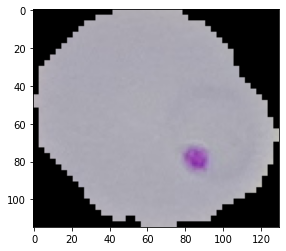

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/drive/MyDrive/cell_images/training/Parasitized/C180P141NThinF_IMG_20151201_165659_cell_6.png', 0)
plt.imshow(img)
plt.show()

In [ ]:
list(paths.list_images('/content/drive/MyDrive/cell_images/validation/Uninfected'))[:3]

['/content/drive/MyDrive/cell_images/validation/Uninfected/C76P37ThinF_IMG_20150815_172808_cell_15.png',
 '/content/drive/MyDrive/cell_images/validation/Uninfected/C76P37ThinF_IMG_20150815_172808_cell_186.png',
 '/content/drive/MyDrive/cell_images/validation/Uninfected/C102P63ThinF_IMG_20150918_163054_cell_87.png']

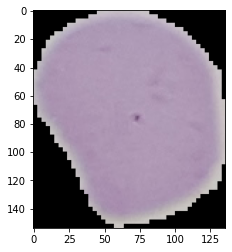

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/cell_images/validation/Uninfected/C175P136NThinF_IMG_20151127_141325_cell_187.png', 0)
plt.imshow(img)
plt.show()

In [ ]:
print(len(list(paths.list_images('/content/drive/MyDrive/cell_images/Parasitized'))))

13779


# VGG16 get feature and labels


In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = "imagenet",include_top = False)
for layer in conv_base.layers:
	layer.trainable = False
conv_base.summary()
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1 / 255.0)

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [ ]:
from keras import layers
from keras import models
from keras import losses
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Train_DIR = '/content/drive/MyDrive/cell_images/training'
Test_DIR = '/content/drive/MyDrive/cell_images/testing'
Validation_DIR = '/content/drive/MyDrive/cell_images/validation'

#conv_base = VGG16(weights='imagenet',include_top=False) 

#conv_base.summary()
batch_size=20
def extract_features(directory, sample_count):
    ##features = np.zeros(shape=(sample_count, 4, 4, 512)) 
    features = np.zeros(shape=(sample_count, 2, 2, 512)) 
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory, 
        ##target_size=(32,32), 
        target_size=(64,64),
        batch_size=batch_size, 
        class_mode='binary')
    i=0
    print ("before for loop")
    for inputs_batch, labels_batch in generator:
        #print(labels_batch)
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        #print('********')
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        #print('----------')
        i += 1
        
        if i * batch_size >= sample_count:
            break
    return features, labels


train_features, train_labels = extract_features(Train_DIR, 19842) 
validation_features, validation_labels = extract_features(Validation_DIR,2204) 
test_features, test_labels = extract_features(Test_DIR,5512)

train_features = np.reshape(train_features, (19842, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (2204, 4 * 4 * 512))
test_features = np.reshape(test_features, (5512, 4 * 4 * 512))
#Sample_size, used to adjust the number of image feature to train model

Found 19842 images belonging to 2 classes.
before for loop
Found 2204 images belonging to 2 classes.
before for loop
Found 5512 images belonging to 2 classes.
before for loop


In [ ]:
print(len(test_features))
print(len(test_features[0]))

5512
8192


In [ ]:
print(len(train_features))
print(len(train_features[0]))

19842
8192


In [ ]:
print(len(validation_features))

2204


In [ ]:
print(train_features[0])

[0.79774022 0.         2.67328429 ... 0.         0.51967323 0.        ]


In [ ]:
print(len(train_features))

19842


In [ ]:
print(len(test_labels))
#print(len(test_labels[0]))

5512


In [ ]:
import numpy as np
np.save('train_features', train_features)
#np.save('train_labels', train_labels)
np.save('validation_features', validation_features)
#np.save('validation_labels', validation_features)
np.save('test_features', test_features)
#np.save('test_labels', test_labels)

In [ ]:
import numpy as np
train_features=np.load('train_features.npy')
validation_features = np.load('validation_features.npy')
test_features = np.load('test_features.npy')


ValueError: ignored

In [ ]:
train_features

array([[0.79774022, 0.        , 2.67328429, ..., 0.        , 0.51967323,
        0.        ],
       [1.05558133, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.60595429, 0.        , 0.79443324, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.63954985, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.95366281, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88769072, 0.        , 1.50606585, ..., 0.        , 0.10835409,
        0.        ]])

In [ ]:
print(type(test_labels))

<class 'numpy.ndarray'>


In [ ]:
import numpy
numpy.savetxt("test_labels.csv", test_labels, delimiter=",",header='index')
numpy.savetxt("train_labels.csv", train_labels, delimiter=",",header='index')
numpy.savetxt("validation_labels.csv", validation_labels, delimiter=",",header='index')

In [ ]:
import pandas as pd
testlab=pd.read_csv('test_labels.csv')
trainlab=pd.read_csv('train_labels.csv')
validationlab=pd.read_csv('validation_labels.csv')

In [ ]:
trainlab

,# index
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
19837,1.0
19838,0.0
19839,1.0
19840,1.0


In [ ]:
trainlab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19842 entries, 0 to 19841
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   # index  19842 non-null  float64
dtypes: float64(1)
memory usage: 155.1 KB


#XGBoosting


In [ ]:
!pip install xgboost  
    
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
#               min_child_weight=1, missing=nan, monotone_constraints='()',
#               n_estimators=100, n_jobs=0, num_parallel_tree=1,
#               objective='multi:softprob', random_state=0, reg_alpha=0,
#               reg_lambda=1, scale_pos_weight=None, subsample=1,
#               tree_method='exact', validate_parameters=1, verbosity=None)   

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns

from tensorflow.keras.layers import BatchNormalization

In [ ]:
x_train, y_train, x_test, y_test = train_features, trainlab, test_features, testlab
#x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train, y_train) #For sklearn no one hot encoding

#Now predict using the trained XG model. 
prediction = model.predict(x_test)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =  0.8648403483309144


In [ ]:
prediction

array([1., 1., 1., ..., 1., 1., 0.])

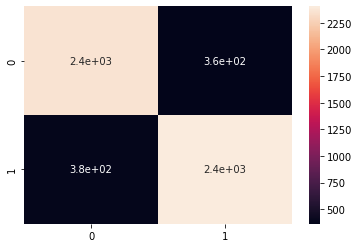

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

In [ ]:
'''
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10)
results = cross_val_score(model,x_train,y_train , cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
'''

'\nfrom numpy import loadtxt\nimport xgboost\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import cross_val_score\n\nkfold = KFold(n_splits=10)\nresults = cross_val_score(model,x_train,y_train , cv=kfold)\nprint("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))\n'

In [ ]:
'''
kfold = KFold(n_splits=10)
results_2 = cross_val_score(validation_features, validationlab, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results_2.mean()*100, results_2.std()*100))
'''

'\nkfold = KFold(n_splits=10)\nresults_2 = cross_val_score(validation_features, validationlab, cv=kfold)\nprint("Accuracy: %.2f%% (%.2f%%)" % (results_2.mean()*100, results_2.std()*100))\n'

#RF

In [ ]:
x_train, y_train, x_test, y_test = train_features, trainlab, test_features, testlab

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model_rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model_rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_features='sqrt')

In [ ]:
# Actual class predictions
rf_predictions = model_rf.predict(x_test)
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, rf_predictions))

Accuracy =  0.8661103047895501


In [ ]:
'''
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}
'''

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(x_train,y_train.values.ravel())
'''

#Neural network

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, optimizers, layers, Model

#models = conv_base
model=Sequential()
##model.add(layers.Dense(512, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dense(512, activation='relu', input_dim= 2 * 2 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='softmax'))
model.summary()
opt = optimizers.Adam(learning_rate=0.001) 
##learning rate could be step by step, like the first couple of steps could be large
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
#loss=keras.losses.CategoricalCrossentropy(from_logits=True)
# model.compile(optimizer=optimizers.RMSprop(lr=0.1),
#               loss=losses.categorical_crossentropy,
#               metrics=['acc'])
print('Compiling Model');

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 513       
                                                                 
Total params: 4,195,329
Trainable params: 4,195,329
Non-trainable params: 0
_________________________________________________________________
Compiling Model


In [ ]:
trainlab

,# index
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
19837,1.0
19838,0.0
19839,1.0
19840,1.0


In [ ]:
history = model.fit(train_features, trainlab,epochs = 60,batch_size =32,verbose = 1,validation_data = (validation_features, validationlab))

print('Fitting Model');

Epoch 1/60
621/621 [==============================] - 47s 74ms/step - loss: 0.4024 - accuracy: 0.8231 - val_loss: 0.3384 - val_accuracy: 0.8553
Epoch 2/60
621/621 [==============================] - 43s 69ms/step - loss: 0.3471 - accuracy: 0.8501 - val_loss: 0.3292 - val_accuracy: 0.8557
Epoch 3/60
621/621 [==============================] - 43s 69ms/step - loss: 0.3346 - accuracy: 0.8542 - val_loss: 0.3257 - val_accuracy: 0.8593
Epoch 4/60
621/621 [==============================] - 34s 54ms/step - loss: 0.3326 - accuracy: 0.8556 - val_loss: 0.3681 - val_accuracy: 0.8385
Epoch 5/60
621/621 [==============================] - 35s 57ms/step - loss: 0.3292 - accuracy: 0.8603 - val_loss: 0.3315 - val_accuracy: 0.8603
Epoch 6/60
621/621 [==============================] - 35s 57ms/step - loss: 0.3215 - accuracy: 0.8614 - val_loss: 0.3170 - val_accuracy: 0.8639
Epoch 7/60
621/621 [==============================] - 36s 57ms/step - loss: 0.3208 - accuracy: 0.8646 - val_loss: 0.3171 - val_accuracy:

In [ ]:
train_acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

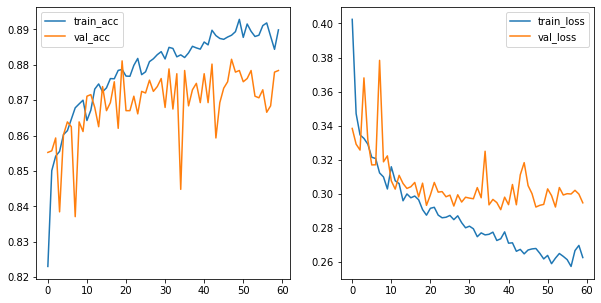

In [ ]:
epochs_range = range(len(train_acc))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, train_acc, label='train_acc')
plt.plot(epochs_range, val_acc, label='val_acc')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, train_loss, label='train_loss')
plt.plot(epochs_range, val_loss, label='val_loss')
plt.legend()

In [ ]:
model.evaluate(test_features,testlab,use_multiprocessing=True,workers=10)

173/173 [==============================] - 2s 11ms/step - loss: 0.2932 - accuracy: 0.8832


[0.2932254672050476, 0.8831639885902405]

In [ ]:
#---------------------------

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, optimizers, layers, Model

#models = conv_base
model=Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
#model.add(layers.Dense(1,activation='softmax'))
model.summary()
opt = optimizers.Adam(learning_rate=0.001) 
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
#loss=keras.losses.CategoricalCrossentropy(from_logits=True)
# model.compile(optimizer=optimizers.RMSprop(lr=0.1),
#               loss=losses.categorical_crossentropy,
#               metrics=['acc'])
print('Compiling Model');

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 513       
                                                                 
Total params: 4,195,329
Trainable params: 4,195,329
Non-trainable params: 0
_________________________________________________________________
Compiling Model


In [ ]:
history = model.fit(train_features, trainlab,epochs = 100,batch_size =32,verbose = 1,validation_data = (validation_features, validationlab))

print('Fitting Model');

Epoch 1/100
621/621 [==============================] - 24s 38ms/step - loss: 0.4207 - accuracy: 0.8196 - val_loss: 0.3505 - val_accuracy: 0.8371
Epoch 2/100
621/621 [==============================] - 25s 40ms/step - loss: 0.3478 - accuracy: 0.8500 - val_loss: 0.3242 - val_accuracy: 0.8525
Epoch 3/100
621/621 [==============================] - 25s 40ms/step - loss: 0.3370 - accuracy: 0.8541 - val_loss: 0.3224 - val_accuracy: 0.8557
Epoch 4/100
621/621 [==============================] - 24s 38ms/step - loss: 0.3230 - accuracy: 0.8595 - val_loss: 0.3216 - val_accuracy: 0.8598
Epoch 5/100
621/621 [==============================] - 24s 39ms/step - loss: 0.3184 - accuracy: 0.8639 - val_loss: 0.3598 - val_accuracy: 0.8439
Epoch 6/100
621/621 [==============================] - 24s 38ms/step - loss: 0.3193 - accuracy: 0.8639 - val_loss: 0.3138 - val_accuracy: 0.8662
Epoch 7/100
621/621 [==============================] - 24s 38ms/step - loss: 0.3173 - accuracy: 0.8644 - val_loss: 0.3270 - val_ac

In [ ]:
train_acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

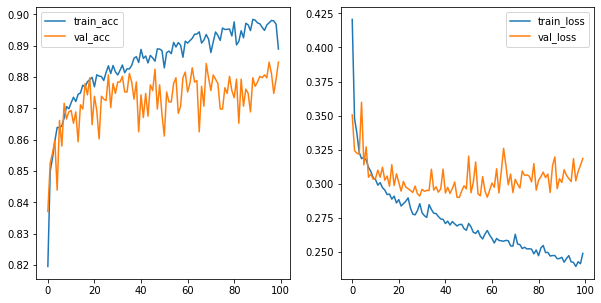

In [ ]:
epochs_range = range(len(train_acc))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, train_acc, label='train_acc')
plt.plot(epochs_range, val_acc, label='val_acc')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, train_loss, label='train_loss')
plt.plot(epochs_range, val_loss, label='val_loss')
plt.legend()

In [ ]:
prediction = model.predict(test_features)

prediction

array([[0.959654  ],
       [0.12196261],
       [0.9667339 ],
       ...,
       [0.99311054],
       [0.9982201 ],
       [0.99950963]], dtype=float32)

In [ ]:
model.evaluate(test_features,testlab,use_multiprocessing=True,workers=10)

173/173 [==============================] - 2s 12ms/step - loss: 0.3086 - accuracy: 0.8855


[0.30857551097869873, 0.8855224847793579]